## CS 425 - Final Project Thanya Nguyen 

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import entropy as en
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
import pandas as pd
from sklearn.metrics import accuracy_score

### scatter plot of time_inc vs rating wins as black vs. white

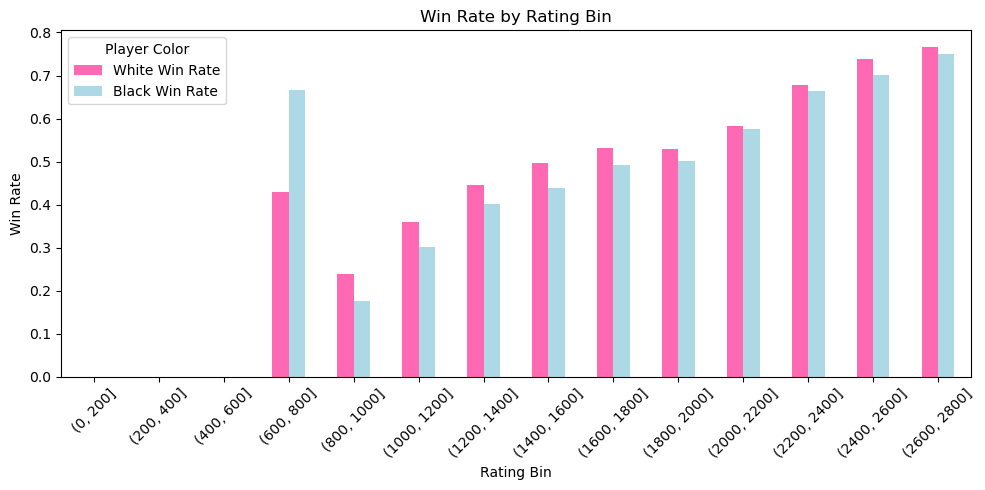

In [10]:
# chess_df = pd.read_csv("games.csv")
# features = ["winner", "white_rating", "black_rating"]
# y = (chess_df[features])
# print(y)
df = pd.read_csv('games.csv')
#encoding
def get_winner(row):
    if row['winner'] == 'white':
        return 'white'
    elif row['winner'] == 'black':
        return 'black'
    else:
        return 'draw'

# Apply the function to create a new column 'winner_color'
df['winner_color'] = df.apply(get_winner, axis=1)

# Extract the rating and create bins. Assuming 'white_rating' and 'black_rating' are column names.
rating_bins = range(0, 3000, 200)  # Adjust the range and bin size to your needs
df['white_rating_bin'] = pd.cut(df['white_rating'], bins=rating_bins)
df['black_rating_bin'] = pd.cut(df['black_rating'], bins=rating_bins)


white_win_rates = df[df['winner_color'] == 'white'].groupby('white_rating_bin').size() / df.groupby('white_rating_bin').size()
black_win_rates = df[df['winner_color'] == 'black'].groupby('black_rating_bin').size() / df.groupby('black_rating_bin').size()
win_rates = pd.DataFrame({
    'Rating Bin': [str(bin) for bin in white_win_rates.index],
    'White Win Rate': white_win_rates.values,
    'Black Win Rate': black_win_rates.values
})

color = ['hotpink', 'lightblue']
win_rates.plot(x='Rating Bin', y=['White Win Rate', 'Black Win Rate'], kind='bar', figsize=(10,5), color = color)

plt.title('Win Rate by Rating Bin')
plt.xlabel('Rating Bin')
plt.ylabel('Win Rate')
plt.xticks(rotation=45)
plt.legend(title='Player Color',)
plt.tight_layout()  # Adjust layout for better fit of x-tick labels
plt.show()


# SVM on Chess maybe..
### gonna use C and max_iter

this reads in the white rating, blac rating, and turns for the vienna game

In [11]:

import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("games.csv")

# filter for Vienna Opening vienna_df
vienna_df = df[df['opening_eco'].isin(['C25', 'C26', 'C27', 'C28', 'C29'])].copy()
status_encoding = {
    'mate': 1,
    'resign': 2,
    'outoftime': 2,
    'draw': 3
}
vienna_df['victory_status'] = vienna_df['victory_status'].replace(status_encoding)

# Encoding for the winner
# Assuming 'winner' column exists with 'white', 'black', 'draw'
winner_encoding = {
    'white': 1,
    'black': 2,
    'draw': 3
}
vienna_df['winner_encoded'] = vienna_df['winner'].replace(winner_encoding)

def FormatIncrementCode(inc):
    splitted = inc.split('+')
    return int(splitted[0])
    
def CategorizeTime(inc):
    if inc < 3:
        return 'bullet'
    elif inc < 9:
        return 'blitz'
    elif inc < 16:
        return 'rapid'
    else:
        return 'classical'

vienna_df['increment_code'] = np.vectorize(FormatIncrementCode)(vienna_df['increment_code'])
#print(vienna_df['increment_code'].head(5))
vienna_df['format'] = np.vectorize(CategorizeTime)(vienna_df['increment_code'])
#print(vienna_df['format'].head(5))
vienna_df['rating_difference'] = vienna_df['white_rating'] - vienna_df['black_rating']
vienna_df['rating_difference'].head(5)

features = ["white_rating", "black_rating", "turns", "victory_status", "increment_code", "rating_difference"]
X = vienna_df[features].values
y = vienna_df['winner_encoded']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_sub_train, X_valid, y_sub_train, y_valid = train_test_split(X_train, y_train, test_size=0.125, random_state=42)
print(features)
print(X)
print(y)

['white_rating', 'black_rating', 'turns', 'victory_status', 'increment_code', 'rating_difference']
[[1492 1458   28    2   10   34]
 [1186 1223   35    2   15  -37]
 [1242 1125  105    2   15  117]
 [1308 1441   78    2   10 -133]
 [2104 2456   26    2    5 -352]
 [2301 2449   32    2    5 -148]
 [1799 1862   75    1   10  -63]
 [1759 1790   63    1   10  -31]
 [1233 1174   29    1   15   59]
 [2003 1418   44    2    8  585]
 [2139 1407   23    2   20  732]
 [1500 1473   70    1   10   27]
 [1285 1598   60    1   10 -313]
 [1500 1509   53    1    8   -9]
 [1535 1634  103    1   10  -99]
 [1355 1592   69    2   10 -237]
 [1586 1383  111    1    7  203]
 [1055 1034   45    2   15   21]
 [1324 1096   49    1   13  228]
 [1519 1026  119    2   10  493]
 [1216 1352   80    2   10 -136]
 [1398 1312   27    1   10   86]
 [2264 1753   17    1   10  511]
 [2264 1753   13    1   10  511]
 [1386 1468   52    2   10  -82]
 [1309 1730   56    1   15 -421]
 [1094 1144   81    1   15  -50]
 [1239 169

validation accuracy at  0 0  -  0.75
validation accuracy at  0 1  -  0.75
validation accuracy at  0 2  -  0.75
validation accuracy at  0 3  -  0.75
validation accuracy at  0 4  -  0.75
validation accuracy at  0 5  -  0.75
validation accuracy at  1 0  -  0.6875
validation accuracy at  1 1  -  0.6875
validation accuracy at  1 2  -  0.6875
validation accuracy at  1 3  -  0.6875
validation accuracy at  1 4  -  0.6875
validation accuracy at  1 5  -  0.6875
validation accuracy at  2 0  -  0.75
validation accuracy at  2 1  -  0.625
validation accuracy at  2 2  -  0.625
validation accuracy at  2 3  -  0.75
validation accuracy at  2 4  -  0.75
validation accuracy at  2 5  -  0.75
validation accuracy at  3 0  -  0.625
validation accuracy at  3 1  -  0.5625
validation accuracy at  3 2  -  0.4375
validation accuracy at  3 3  -  0.5
validation accuracy at  3 4  -  0.75
validation accuracy at  3 5  -  0.625


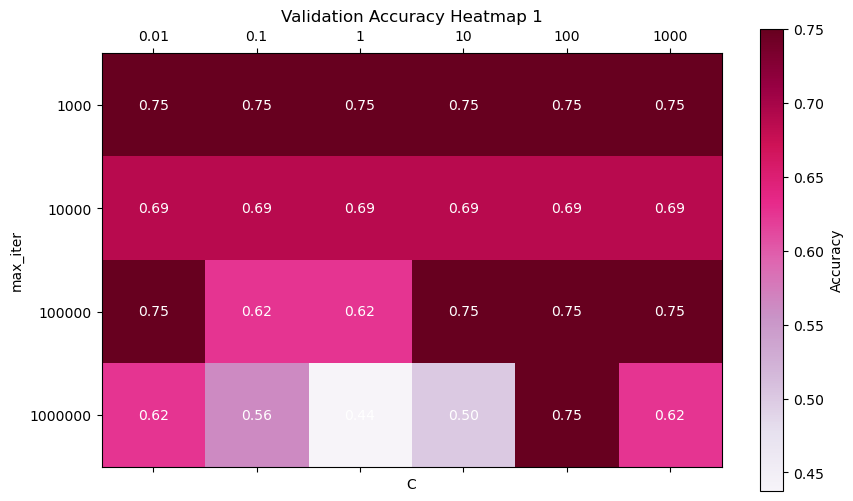

In [12]:
# Define parameter ranges
max_iter = [1000, 10000, 100000, 1000000]
C = [0.01, 0.1, 1, 10, 100, 1000]

# Initialize variables for tracking the highest accuracy
highest_acc_i = 0
highest_acc_j = 0
acc_tracker = 0

# Suppress warnings
warnings.filterwarnings("ignore")

# Initialize an array to store accuracies
accuracies = np.zeros((len(max_iter), len(C)))

# Iterate over combinations of max_iter and C
for i, m_iter in enumerate(max_iter):
    for j, C_iter in enumerate(C):
        clf = make_pipeline(LinearSVC(random_state=0, C=C_iter, max_iter=m_iter))
        clf.fit(X_sub_train, y_sub_train)
        y_pred = clf.predict(X_valid)
        accuracy = accuracy_score(y_valid, y_pred)
        if accuracy > acc_tracker:
            acc_tracker = accuracy
            highest_acc_i = m_iter
            highest_acc_j = C_iter
        accuracies[i][j] = accuracy
        print("validation accuracy at ", i , j , " - ", accuracy)

# Plot the heatmap
fig, ax = plt.subplots(figsize=(10,6))
cax = ax.matshow(accuracies, cmap="PuRd")
plt.colorbar(cax, label="Accuracy")
ax.set_xticks(np.arange(len(C)))
ax.set_yticks(np.arange(len(max_iter)))
ax.set_xticklabels(C)
ax.set_yticklabels(max_iter)
ax.set_xlabel('C')
ax.set_ylabel('max_iter')

for i in range(len(max_iter)):
    for j in range(len(C)):
        text = ax.text(j, i, '{:.2f}'.format(accuracies[i, j]), ha="center", va="center", color="w")

ax.set_title("Validation Accuracy Heatmap 1")
plt.show()

### heatmap w less hyperparameters - 
excluded the black and white ratings, ML has to guess who won with rating difference, increment time, number of turns, and victory status (resign, checkmate, draw).

In [13]:

import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("games.csv")

# Filter for Vienna Opening vienna_df
vienna_df = df[df['opening_eco'].isin(['C25', 'C26', 'C27', 'C28', 'C29'])].copy()
status_encoding = {
    'mate': 1,
    'resign': 2,
    'outoftime': 2,
    'draw': 0
}
vienna_df['victory_status'] = vienna_df['victory_status'].replace(status_encoding)

# Encoding for the winner
# Assuming 'winner' column exists with 'white', 'black', 'draw'
winner_encoding = {
    'white': 1,
    'black': 2,
    'draw': 0
}
vienna_df['winner_encoded'] = vienna_df['winner'].replace(winner_encoding)

def FormatIncrementCode(inc):
    splitted = inc.split('+')
    return int(splitted[0])
    
def CategorizeTime(inc):
    if inc < 3:
        return 'bullet'
    elif inc < 9:
        return 'blitz'
    elif inc < 16:
        return 'rapid'
    else:
        return 'classical'

vienna_df['increment_code'] = np.vectorize(FormatIncrementCode)(vienna_df['increment_code'])
#print(vienna_df['increment_code'].head(5))
vienna_df['format'] = np.vectorize(CategorizeTime)(vienna_df['increment_code'])
#print(vienna_df['format'].head(5))
vienna_df['rating_difference'] = vienna_df['white_rating'] - vienna_df['black_rating']
vienna_df['rating_difference'].head(5)


# Features and target variable
features = ["turns", "victory_status", "increment_code", "rating_difference"]
X = vienna_df[features].values
y = vienna_df['winner_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_sub_train, X_valid, y_sub_train, y_valid = train_test_split(X_train, y_train, test_size=0.125, random_state=42)
print(features)
print(X)
print(y)


['turns', 'victory_status', 'increment_code', 'rating_difference']
[[  28    2   10   34]
 [  35    2   15  -37]
 [ 105    2   15  117]
 [  78    2   10 -133]
 [  26    2    5 -352]
 [  32    2    5 -148]
 [  75    1   10  -63]
 [  63    1   10  -31]
 [  29    1   15   59]
 [  44    2    8  585]
 [  23    2   20  732]
 [  70    1   10   27]
 [  60    1   10 -313]
 [  53    1    8   -9]
 [ 103    1   10  -99]
 [  69    2   10 -237]
 [ 111    1    7  203]
 [  45    2   15   21]
 [  49    1   13  228]
 [ 119    2   10  493]
 [  80    2   10 -136]
 [  27    1   10   86]
 [  17    1   10  511]
 [  13    1   10  511]
 [  52    2   10  -82]
 [  56    1   15 -421]
 [  81    1   15  -50]
 [ 109    2   10 -460]
 [  99    2   10   21]
 [  56    1   10 -578]
 [ 134    1   30   62]
 [  40    2   10 -123]
 [  22    2   10 -179]
 [  66    2   15  -58]
 [  39    1   15  113]
 [ 114    2   15  330]
 [ 125    2   10   39]
 [   5    2   10   60]
 [  79    1   15  564]
 [  57    1   10    9]
 [ 101    1  

validation accuracy at  0 0  -  0.6875
validation accuracy at  0 1  -  0.6875
validation accuracy at  0 2  -  0.625
validation accuracy at  0 3  -  0.75
validation accuracy at  0 4  -  0.875
validation accuracy at  0 5  -  0.875
validation accuracy at  1 0  -  0.625
validation accuracy at  1 1  -  0.6875
validation accuracy at  1 2  -  0.8125
validation accuracy at  1 3  -  0.375
validation accuracy at  1 4  -  0.625
validation accuracy at  1 5  -  0.75
validation accuracy at  2 0  -  0.6875
validation accuracy at  2 1  -  0.75
validation accuracy at  2 2  -  0.8125
validation accuracy at  2 3  -  0.8125
validation accuracy at  2 4  -  0.375
validation accuracy at  2 5  -  0.875
validation accuracy at  3 0  -  0.6875
validation accuracy at  3 1  -  0.75
validation accuracy at  3 2  -  0.75
validation accuracy at  3 3  -  0.8125
validation accuracy at  3 4  -  0.8125
validation accuracy at  3 5  -  0.75


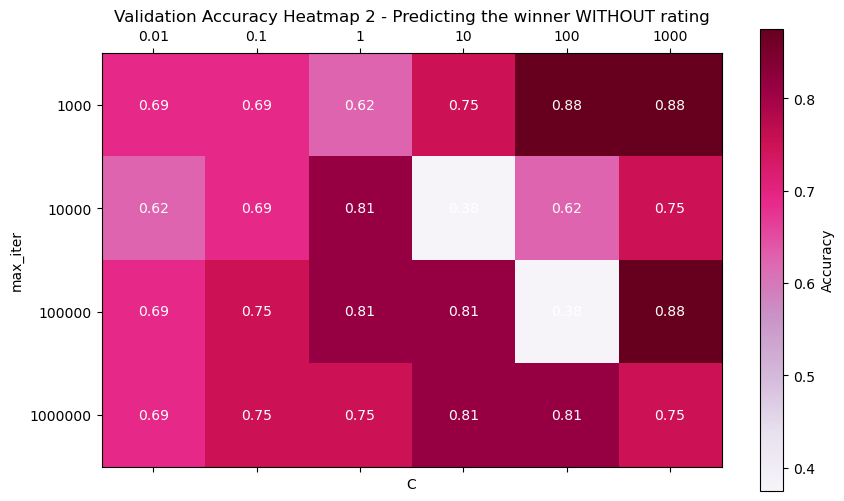

In [14]:
# Define parameter ranges
max_iter = [1000, 10000, 100000, 1000000]
C = [0.01, 0.1, 1, 10, 100, 1000]

# Initialize variables for tracking the highest accuracy
highest_acc_i = 0
highest_acc_j = 0
acc_tracker = 0

# Suppress warnings
warnings.filterwarnings("ignore")


accuracies = np.zeros((len(max_iter), len(C)))

for i, m_iter in enumerate(max_iter):
    for j, C_iter in enumerate(C):
        clf = make_pipeline(LinearSVC(random_state=0, C=C_iter, max_iter=m_iter))
        clf.fit(X_sub_train, y_sub_train)
        y_pred = clf.predict(X_valid)
        accuracy = accuracy_score(y_valid, y_pred)
        if accuracy > acc_tracker:
            acc_tracker = accuracy
            highest_acc_i = m_iter
            highest_acc_j = C_iter
        accuracies[i][j] = accuracy
        print("validation accuracy at ", i , j , " - ", accuracy)

# Plot the heatmap
fig, ax = plt.subplots(figsize=(10,6))
cax = ax.matshow(accuracies, cmap="PuRd")
plt.colorbar(cax, label="Accuracy")
ax.set_xticks(np.arange(len(C)))
ax.set_yticks(np.arange(len(max_iter)))
ax.set_xticklabels(C)
ax.set_yticklabels(max_iter)
ax.set_xlabel('C')
ax.set_ylabel('max_iter')
ax.set_title("Validation Accuracy Heatmap 2 - Predicting the winner WITHOUT rating")

for i in range(len(max_iter)):
    for j in range(len(C)):
        text = ax.text(j, i, '{:.2f}'.format(accuracies[i, j]), ha="center", va="center", color="w")
plt.show()


# Heatmap with even less hyperparameters
trying to predict HOW they won given the rating difference, the # of turns, int time inc and the winner

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split


df = pd.read_csv("games.csv")


vienna_df = df[df['opening_eco'].isin(['C25', 'C26', 'C27', 'C28', 'C29'])].copy()
status_encoding = {
    'mate': 1,
    'resign': 2,
    'outoftime': 2,
    'draw': 0
}
vienna_df['victory_status'] = vienna_df['victory_status'].replace(status_encoding)

# Encoding for the winner
# Assuming 'winner' column exists with 'white', 'black', 'draw'
winner_encoding = {
    'white': 1,
    'black': 2,
    'draw': 0
}
vienna_df['winner_encoded'] = vienna_df['winner'].replace(winner_encoding)

def FormatIncrementCode(inc):
    splitted = inc.split('+')
    return int(splitted[0])
    
def CategorizeTime(inc):
    if inc < 3:
        return 'bullet'
    elif inc < 9:
        return 'blitz'
    elif inc < 16:
        return 'rapid'
    else:
        return 'classical'

vienna_df['increment_code'] = np.vectorize(FormatIncrementCode)(vienna_df['increment_code'])
#print(vienna_df['increment_code'].head(5))
vienna_df['format'] = np.vectorize(CategorizeTime)(vienna_df['increment_code'])
#print(vienna_df['format'].head(5))
vienna_df['rating_difference'] = vienna_df['white_rating'] - vienna_df['black_rating']
vienna_df['rating_difference'].head(5)


features = ["turns", "winner_encoded", "increment_code", "rating_difference"]
X = vienna_df[features].values
y = vienna_df['victory_status']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_sub_train, X_valid, y_sub_train, y_valid = train_test_split(X_train, y_train, test_size=0.125, random_state=42)
# print(features)
# print(X)
# print(y)




validation accuracy at  0 0  -  0.8125
validation accuracy at  0 1  -  0.4375
validation accuracy at  0 2  -  0.625
validation accuracy at  0 3  -  0.375
validation accuracy at  0 4  -  0.375
validation accuracy at  0 5  -  0.375
validation accuracy at  1 0  -  0.6875
validation accuracy at  1 1  -  0.5625
validation accuracy at  1 2  -  0.6875
validation accuracy at  1 3  -  0.8125
validation accuracy at  1 4  -  0.625
validation accuracy at  1 5  -  0.8125
validation accuracy at  2 0  -  0.6875
validation accuracy at  2 1  -  0.75
validation accuracy at  2 2  -  0.875
validation accuracy at  2 3  -  0.625
validation accuracy at  2 4  -  0.4375
validation accuracy at  2 5  -  0.625
validation accuracy at  3 0  -  0.6875
validation accuracy at  3 1  -  0.75
validation accuracy at  3 2  -  0.75
validation accuracy at  3 3  -  0.6875
validation accuracy at  3 4  -  0.625
validation accuracy at  3 5  -  0.875


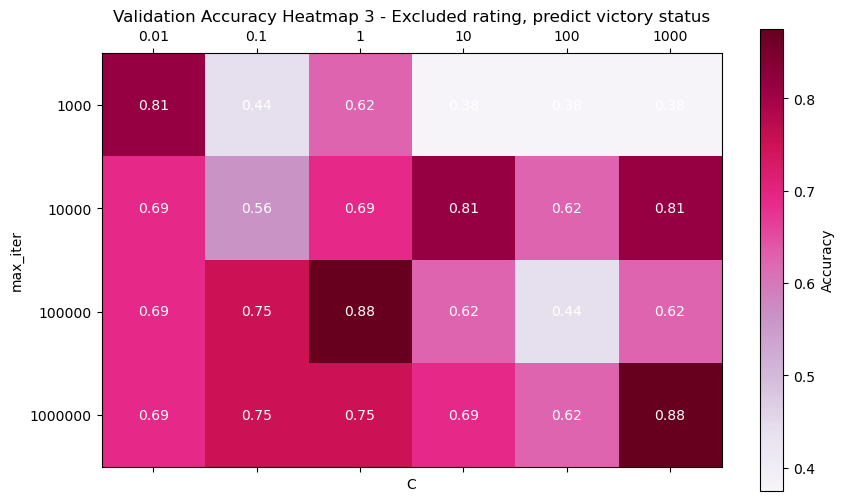

In [16]:
# Define parameter ranges
max_iter = [1000, 10000, 100000, 1000000]
C = [0.01, 0.1, 1, 10, 100, 1000]

# Initialize variables for tracking the highest accuracy
highest_acc_i = 0
highest_acc_j = 0
acc_tracker = 0

# Suppress warnings
warnings.filterwarnings("ignore")

accuracies = np.zeros((len(max_iter), len(C)))

# Iterate over combinations of max_iter and C
for i, m_iter in enumerate(max_iter):
    for j, C_iter in enumerate(C):
        clf = make_pipeline(LinearSVC(random_state=0, C=C_iter, max_iter=m_iter))
        clf.fit(X_sub_train, y_sub_train)
        y_pred = clf.predict(X_valid)
        accuracy = accuracy_score(y_valid, y_pred)
        if accuracy > acc_tracker:
            acc_tracker = accuracy
            highest_acc_i = m_iter
            highest_acc_j = C_iter
        accuracies[i][j] = accuracy
        print("validation accuracy at ", i , j , " - ", accuracy)

# Plot the heatmap
fig, ax = plt.subplots(figsize=(10,6))
cax = ax.matshow(accuracies, cmap="PuRd")
plt.colorbar(cax, label="Accuracy")
ax.set_xticks(np.arange(len(C)))
ax.set_yticks(np.arange(len(max_iter)))
ax.set_xticklabels(C)
ax.set_yticklabels(max_iter)
ax.set_xlabel('C')
ax.set_ylabel('max_iter')
ax.set_title("Validation Accuracy Heatmap 3 - Excluded rating, predict victory status")

for i in range(len(max_iter)):
    for j in range(len(C)):
        text = ax.text(j, i, '{:.2f}'.format(accuracies[i, j]), ha="center", va="center", color="w")
plt.show()


notes: what if u tried to predicted the victory statw WITH the ratings ?